In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("hour.csv")

---

Exploratory Data Analysis

In [3]:
# Display first 5 records 
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Info about columns, type of data 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Getting various statistical data like Mean, Standard Deviation, Median, Max Value, Min Value (excludes categorical vars)
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Checking if columns have null values, if null- we replace with mean/median or simply drop these entries
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Get the count of zeros in column 'cnt'  
column = dataset['cnt'] 
count = column[column == 0].count()
print('Count of zeros in cnt : ', count)

Count of zeros in cnt :  0


In [8]:
# Checking correlation between variables (including target var to identify how features affect it) 
dataset.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


---

Univariate Analysis

In [ ]:
# Relationship between Temperation and Count
sns.lineplot(x='temp', y='cnt', data=dataset).set(xlabel="Temperature", ylabel="Total Bikes Rented")

In [ ]:
# Relationship between Humidity and Count
sns.lineplot(x='hum', y='cnt', data=dataset).set(xlabel="Humidity", ylabel="Total Bikes Rented")

In [ ]:
# Count of bikes rented per season
sns.countplot(x='season', data=dataset).set(xlabel="Season", ylabel="Total Bikes Rented")
dataset['season'].value_counts()

In [ ]:
# Count of bikes rented per year(2011, 2012)
sns.violinplot(x='yr', y='cnt', data=dataset).set(xlabel="Year", ylabel="Total Bikes Rented")
dataset['yr'].value_counts()

In [ ]:
# Count of bikes rented per month
plt.figure(figsize = (12,8))
sns.barplot(x='mnth', y='cnt', data=dataset).set(xlabel="Month", ylabel="Total Bikes Rented")

---

Bivariate Analysis

In [ ]:
# Bikes Rented vs Weather Condition with respect to the year
sns.barplot(x="weathersit", y="cnt", hue="yr", data=dataset).set(xlabel="Weather Condition", ylabel="Total Bikes Rented")
# how to get count of bikes in each category and year??

In [ ]:
# Bikes Rented vs Month with respect to the season
plt.figure(figsize = (12,8))
sns.barplot(x="workingday", y="cnt", hue="season", data=dataset).set(xlabel="Working Day", ylabel="Total Bikes Rented")

In [ ]:
# Bikes rented per hour with respect to a season
plt.figure(figsize = (12,8))
sns.pointplot(x="hr", y="cnt", hue="season", data=dataset).set(xlabel="Hour", ylabel="Total Bikes Rented")

- Peaks can be seen at around 8am and 5pm (office hours)

---

Outlier Analysis

In [ ]:
# Outlier Analysis for month
plt.figure(figsize = (20,8))
sns.boxplot(data=dataset[['mnth', 'cnt']], x='mnth', y='cnt').set(xlabel="Month", ylabel="Total Bikes Rented")

In [ ]:
# Outlier Analysis for hours
plt.figure(figsize = (20,8))
sns.boxplot(data=dataset[['hr', 'cnt']], x='hr', y='cnt').set(xlabel="Hour", ylabel="Total Bikes Rented")

In [ ]:
# Outlier Analysis for cnt
plt.figure(figsize = (8,6))
sns.boxplot(data=dataset[['cnt']], y='cnt').set(ylabel="Total Bikes Rented")

In [9]:
# calculate interquartile range
q25, q75 = np.percentile(dataset['cnt'], 25), np.percentile(dataset['cnt'], 75)
iqr = q75 - q25
print("Interquartile Range", iqr)

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower = q25 - cut_off
upper = 600

Interquartile Range 241.0


In [10]:
# identify outliers
outliers = [x for x in dataset['cnt'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 665


In [11]:
dataset[(dataset['cnt'] < lower) | (dataset['cnt'] > upper)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3019,3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3187,3188,2011-05-17,2,0,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,3380,2011-05-25,2,0,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
3835,3836,2011-06-13,2,0,6,17,0,1,1,1,0.70,0.6364,0.39,0.3284,72,529,601
3883,3884,2011-06-15,2,0,6,17,0,3,1,1,0.74,0.6515,0.28,0.1045,83,555,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
16957,16958,2012-12-14,4,1,12,8,0,5,1,1,0.20,0.2273,0.69,0.0896,13,623,636
16966,16967,2012-12-14,4,1,12,17,0,5,1,1,0.34,0.3333,0.57,0.1642,40,582,622
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [12]:
# Removing the Outliers
dataset = dataset[(dataset['cnt'] > lower) & (dataset['cnt'] < upper)]

dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
len(dataset.index)

16712

[Text(0, 0.5, 'Total Bikes Rented')]

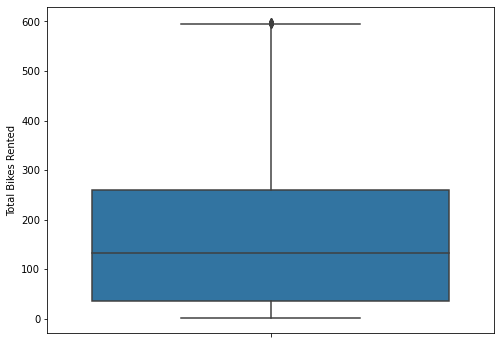

In [14]:
# Outlier Analysis for cnt
plt.figure(figsize = (8,6))
sns.boxplot(data=dataset[['cnt']], y='cnt').set(ylabel="Total Bikes Rented")

---

Feature Transformation

In [ ]:
# Before dropping date, let us introduce a days_old variable which indicates how old is the business
dataset['days_old'] = (pd.to_datetime(dataset['dteday'],format= '%Y-%m-%d') - pd.to_datetime('2011-01-01',format= '%Y-%m-%d')).dt.days

In [ ]:
dataset.tail()

In [ ]:
# Dropping instant, dteday, casual, registered
dataset = dataset.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [ ]:
# Convert season, weathersit, weekday and month to categorical data
dataset.season = dataset.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

dataset.weathersit = dataset.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'})

dataset.mnth = dataset.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

dataset.weekday = dataset.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

In [ ]:
# One-hot encoding season, mnth, weekday, weathersit

dataset = pd.get_dummies(data=dataset,columns=["season","mnth","weekday", "weathersit"])

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

---

Model Development

In [ ]:
working_dt = dataset

In [ ]:
y = working_dt.pop('cnt')
y.head()

In [ ]:
X = working_dt
X.head()

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Function to build OLS model with columns as an input 

def build_ols_model(cols):
    # adding the constant term
    X_const = sm.add_constant(X_train[cols])
    # performing the regression and fitting the model
    result = sm.OLS(y_train, X_const).fit()
    # printing result
    print(result.summary())

In [ ]:
# Function to plot color scaled correlation matrix (Checking Multicollinearity)
def compute_correlation(cols):
    plt.figure(figsize = (15,10))
    corr = X[cols].corr()
    sns.heatmap(corr, cmap='GnBu', annot=True)
    plt.show()

In [ ]:
# Function Compute VIF data for each independent variable in the X_const set (Checking Multicollinearity)

def compute_vif(cols):
    vif = pd.DataFrame()
    vif["features"] = X_train[cols].columns
    vif["vif_Factor"] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    print(vif.sort_values(by='vif_Factor', ascending = False))

---

Model Number 1: Taking all independent features



In [ ]:
cols = X_train.columns
print(cols)

In [ ]:
# Build OLS model 1
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 1
compute_correlation(cols)

In [ ]:
# Compute Vif for model 1
compute_vif(cols)

---

In [ ]:
# Using RFE (Recursive Feature Extraction) to select best 15 features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 21)
rfe.fit(X_train, y_train)

In [ ]:
# Features selected by RFE
X_train.columns[rfe.support_]

---

Model 2: Taking features selected by RFE

In [ ]:
cols = X_train.columns[rfe.support_]
print(cols)

In [ ]:
# Build OLS model 2
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 2
compute_correlation(cols)

In [ ]:
# Compute Vif for model 2
compute_vif(cols)

---

Model 3: Dropping atemp

In [ ]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'weathersit_severe']
print(cols)

In [ ]:
# Build OLS model 3
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 3
compute_correlation(cols)

In [ ]:
# Compute Vif for model 3
compute_vif(cols)

---

Model 4: Dropping weathersit_severe

In [ ]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun']
print(cols)

In [ ]:
# Build OLS model 4
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 4
compute_correlation(cols)

In [ ]:
# Compute Vif for model 4
compute_vif(cols)

---

Model 5: Including workingday

In [ ]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'weathersit_severe', 'workingday']
print(cols)

In [ ]:
# Build OLS model 5
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 5
compute_correlation(cols)

In [ ]:
# Compute Vif for model 5
compute_vif(cols)

---

Model 6: Including days_old

In [ ]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'weathersit_severe', 'workingday', 'days_old']
print(cols)

In [ ]:
# Build OLS model 6
build_ols_model(cols)

In [ ]:
# Compute correlation matrix for model 6
compute_correlation(cols)

In [ ]:
# Compute Vif for model 6
compute_vif(cols)

---

Drawbacks of each model:

In [ ]:
# Model 1,2,6- Multicollinearity
# Model 3,5- Presence of workinday which has a P|t|>0.05 which shows the irrelevance of the feature to the target variable
# Therefore, we will choose Model 4 goiong forward

In [ ]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun']
print(cols)

In [ ]:
lr1 = LinearRegression()
reg_result = lr1.fit(X_train[cols],y_train)
print(reg_result.intercept_, reg_result.coef_)

---

Model Evaluation

In [ ]:
working_dt['cnt'] = y
working_dt.head()

- Linearity

In [ ]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(dataset, x_vars=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun'], y_vars='cnt', size=10, aspect=0.7)

- Mean of Residuals

In [ ]:
y_train_pred = lr1.predict(X_train[cols])

In [ ]:
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

- Check for Homoscedasticity

In [ ]:
p = sns.scatterplot(y_train_pred,residuals)
plt.xlabel('Predicted values of y_train')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.

# from statsmodels.compat import lzip

# name = ['F statistic', 'p-value']
# test = sm.het_goldfeldquandt(residuals, X_train)
# lzip(name, test)

- Normality of Errors

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

- No autocorrelation of residuals

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_train_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted values of y_train')
plt.ylabel('Residuals')
plt.ylim(-100,100)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

---

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

In [ ]:
#Predict the values for test data
y_test_pred = lr1.predict(X_test[cols])

In [ ]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)

In [ ]:
import math

rmse = math.sqrt(mse)
print(rmse)